# Purpose

* Test quintet installation
* Test that the interpolator is working properly

In [1]:
import quintet
import numpy as np
import pylab as plt

In [2]:
q = 1 # Assume mass_1=mass_2
zmin, zmax = 0, 12
total_mass_min, total_mass_max = 0.83*(1+zmin), 2*3.2*(1+zmax) # Note: Redshifted masses
bns_snr_interpolator = quintet.BNSSNRInterpolator(total_mass_min, total_mass_max)

In [3]:
mass_1 = 12
mass_2 = mass_1
luminosity_distance = 3604
theta_jn = np.pi/10
ra, dec, psi, phase, geocent_time = np.pi/5, np.pi/8, np.pi/3, 3*np.pi/5, 182381.12
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0
optimal_snrs = bns_snr_interpolator(mass_1, mass_2, luminosity_distance, theta_jn, ra, dec, psi, phase, geocent_time)
optimal_snrs

5.275394502360717

In [4]:
quintet.compute_bilby_snr(mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, duration=128, sampling_frequency=4096, waveform_arguments= dict(waveform_approximant = "TaylorF2", reference_frequency = 50., minimum_frequency = 10), list_of_detectors=["L1"])

5.125552699346134

## Test  1

Now how well this works over a wide range of values

In [5]:
bilby_snrs = []
bilby_snrs2 = []
interpolated_snrs = []
nsamples = 40
masses = np.linspace(1,13,nsamples)
for i in range(nsamples):
    np.random.seed(i)
    mass_1 = masses[i]
    mass_2 = mass_1
    # Fix luminosity distance
    luminosity_distance = 80
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi)
    ra, dec, psi, phase, geocent_time = np.random.uniform(0,2*np.pi), np.random.uniform(0,np.pi), np.random.uniform(0,2*np.pi), np.random.uniform(0,2*np.pi), np.random.uniform(12933,1529132)
    a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin
    # Compute bilby snr first (verified/reviewed)
    bilby_snr = quintet.compute_bilby_snr(mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, duration=128*4, sampling_frequency=4096, waveform_arguments= dict(waveform_approximant = "TaylorF2", reference_frequency = 50., minimum_frequency = 10), list_of_detectors=["L1"])
    bilby_snrs.append(bilby_snr)
    bilby_snr2 = quintet.compute_bilby_snr(mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, luminosity_distance, 0, psi, phase, geocent_time, ra, dec, duration=128*4, sampling_frequency=4096, waveform_arguments= dict(waveform_approximant = "TaylorF2", reference_frequency = 50., minimum_frequency = 10), list_of_detectors=["L1"])
    bilby_snrs2.append(bilby_snr2)
    # Compute the interpolated snr
    interpolated_snr = bns_snr_interpolator(mass_1, mass_2, luminosity_distance, theta_jn, ra, dec, psi, phase, geocent_time)
    interpolated_snrs.append(interpolated_snr)

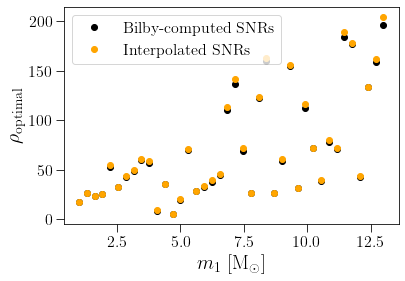

In [7]:
bilby_snrs = np.array(bilby_snrs)
bilby_snrs2 = np.array(bilby_snrs2)
interpolated_snrs = np.array(interpolated_snrs)
plt.plot(masses, bilby_snrs, 'o', color='black', label='Bilby-computed SNRs')
plt.plot(masses, interpolated_snrs, 'o', color='orange', label='Interpolated SNRs')
plt.xlabel(r"$m_1$ [$\rm M_\odot$]")
plt.ylabel(r"$\rho_{\rm optimal}$")
plt.legend()
plt.show()

# Test 2

* How fast is the code?
* Run the code on 1e6 samples and time it

In [8]:
nsamples = int(1e6)
masses = np.linspace(2,13,nsamples)
np.random.seed(0)
mass_1 = masses
mass_2 = mass_1
# Fix luminosity distance
luminosity_distance = 80
# Randomly sample everything else:
theta_jn = np.random.uniform(0,2*np.pi, size=nsamples)
ra, dec, psi, phase, geocent_time = np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,np.pi, size=nsamples), np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(12933,1529132, size=nsamples)
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin
%timeit interpolated_snrs = bns_snr_interpolator(mass_1, mass_2, luminosity_distance, theta_jn, ra, dec, psi, phase, geocent_time)

1.82 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Conclusion:** Takes at 4-5 seconds to run on a million samples. This is sufficiently fast.

# Conclusion

* Works :)